In [10]:
import pandas as pd
import numpy as np
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

from extract_dataframe import TweetDfExtractor
from extract_dataframe import read_json

_, tweet_list = read_json("../data/covid19.json")

In [11]:
tweets_df_extractor = TweetDfExtractor(tweet_list)
tweet_df = tweets_df_extractor.get_tweet_df()
tweet_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","RT @TelGlobalHealth: 🚨Africa is ""in the midst ...",0.000000,0.000000,en,None,None,ketuesriche,551,351,None,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @globalhlthtwit: Dr Moeti is head of WHO in...,0.133333,0.455556,en,None,None,Grid1949,66,92,None,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland"
2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @NHSRDForum: Thank you @research2note for c...,0.316667,0.483333,en,None,None,LeeTomlinson8,1195,1176,None,"[{'text': 'red4research', 'indices': [103, 116]}]","[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",None
3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @HighWireTalk: Former Pfizer VP and Virolog...,0.166667,0.166667,en,None,None,RIPNY08,2666,2704,None,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",None
4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @PeterHotez: I think it’s important that we...,0.300000,0.766667,en,None,None,pash22,28250,30819,None,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom


In [12]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6532 non-null   object 
 1   source              6532 non-null   object 
 2   original_text       6532 non-null   object 
 3   polarity            6532 non-null   float64
 4   subjectivity        6532 non-null   float64
 5   lang                6532 non-null   object 
 6   favorite_count      0 non-null      object 
 7   retweet_count       0 non-null      object 
 8   original_author     6532 non-null   object 
 9   followers_count     6532 non-null   int64  
 10  friends_count       6532 non-null   int64  
 11  possibly_sensitive  1518 non-null   object 
 12  hashtags            6532 non-null   object 
 13  user_mentions       6532 non-null   object 
 14  place               4088 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 765.6

In [13]:
tweet_df.isna()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False
1,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False
2,False,False,False,False,False,False,True,True,False,False,False,True,False,False,True
3,False,False,False,False,False,False,True,True,False,False,False,True,False,False,True
4,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6527,False,False,False,False,False,False,True,True,False,False,False,True,False,False,True
6528,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False
6529,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False
6530,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False


In [21]:
from clean_tweets_dataframe import Clean_Tweets

In [22]:
# remove retweet_count column
clean_tweets = Clean_Tweets(tweet_df)
tweet_df = clean_tweets.drop_unwanted_column(tweet_df, ["retweet_count"])
tweet_df.columns

Automation in Action...!!!


Index(['created_at', 'source', 'original_text', 'polarity', 'subjectivity',
       'lang', 'favorite_count', 'original_author', 'followers_count',
       'friends_count', 'possibly_sensitive', 'hashtags', 'user_mentions',
       'place'],
      dtype='object')

In [24]:
# shape of tweets_df
tweet_df.shape

(6532, 14)

In [25]:
tweet_df = clean_tweets.drop_duplicate(tweet_df)
tweet_df.shape

(6532, 14)

In [26]:
tweet_df = clean_tweets.convert_to_datetime(tweet_df)
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          6532 non-null   datetime64[ns, UTC]
 1   source              6532 non-null   object             
 2   original_text       6532 non-null   object             
 3   polarity            6532 non-null   float64            
 4   subjectivity        6532 non-null   float64            
 5   lang                6532 non-null   object             
 6   favorite_count      0 non-null      object             
 7   original_author     6532 non-null   object             
 8   followers_count     6532 non-null   int64              
 9   friends_count       6532 non-null   int64              
 10  possibly_sensitive  1518 non-null   object             
 11  hashtags            6532 non-null   object             
 12  user_mentions       6532 non-null 

In [27]:
#removing that are not english
tweet_df = clean_tweets.remove_non_english_tweets(tweet_df)
tweet_df.shape

(6532, 14)

In [28]:
# remove non-alphabetic characters
tweet_df["clean_text"] = tweet_df["original_text"].str.replace("[^a-zA-Z#@\s]", "")
tweet_df["clean_text"] = tweet_df["clean_text"].str.replace("\n", "\s")
tweet_df[["original_text", "clean_text"]]

<ipython-input-28-f93d99c41a1d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_df["clean_text"] = tweet_df["original_text"].str.replace("[^a-zA-Z#@\s]", "")


,original_text,clean_text
0,"RT @TelGlobalHealth: 🚨Africa is ""in the midst ...",RT @TelGlobalHealth Africa is in the midst of ...
1,RT @globalhlthtwit: Dr Moeti is head of WHO in...,RT @globalhlthtwit Dr Moeti is head of WHO in ...
2,RT @NHSRDForum: Thank you @research2note for c...,RT @NHSRDForum Thank you @researchnote for cre...
3,RT @HighWireTalk: Former Pfizer VP and Virolog...,RT @HighWireTalk Former Pfizer VP and Virologi...
4,RT @PeterHotez: I think it’s important that we...,RT @PeterHotez I think its important that we d...
...,...,...
6527,RT @Givenkazeni: Zweli please just release the...,RT @Givenkazeni Zweli please just release the ...
6528,RT @HighWireTalk: Former Pfizer VP and Virolog...,RT @HighWireTalk Former Pfizer VP and Virologi...
6529,"@Jenfeds73 @DcrInYYC Respectfully, veterinaria...",@Jenfeds @DcrInYYC Respectfully veterinarians ...
6530,"RT @WHOAFRO: ""Africa needs millions more doses...",RT @WHOAFRO Africa needs millions more doses h...


In [29]:
#text Preprocessing
tweet_df['clean_text']=tweet_df['clean_text'].astype(str)
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x: x.lower())
tweet_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @TelGlobalHealth: 🚨Africa is ""in the midst ...",0.000000,0.000000,en,None,ketuesriche,551,351,None,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass,rt @telglobalhealth africa is in the midst of ...
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @globalhlthtwit: Dr Moeti is head of WHO in...,0.133333,0.455556,en,None,Grid1949,66,92,None,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland",rt @globalhlthtwit dr moeti is head of who in ...
2,2021-06-18 17:56:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @NHSRDForum: Thank you @research2note for c...,0.316667,0.483333,en,None,LeeTomlinson8,1195,1176,None,"[{'text': 'red4research', 'indices': [103, 116]}]","[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",None,rt @nhsrdforum thank you @researchnote for cre...
3,2021-06-18 17:56:10+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @HighWireTalk: Former Pfizer VP and Virolog...,0.166667,0.166667,en,None,RIPNY08,2666,2704,None,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",None,rt @highwiretalk former pfizer vp and virologi...
4,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @PeterHotez: I think it’s important that we...,0.300000,0.766667,en,None,pash22,28250,30819,None,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom,rt @peterhotez i think its important that we d...


In [30]:
tweet_df.to_csv("../data/tweet_cleand_Data.csv",index=False)

In [31]:
#data Exploration


In [40]:
tweet_df= pd.read_csv('../data/tweet_cleand_Data.csv')
tweet_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @TelGlobalHealth: 🚨Africa is ""in the midst ...",0.000000,0.000000,en,NaN,ketuesriche,551,351,NaN,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass,rt @telglobalhealth africa is in the midst of ...
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @globalhlthtwit: Dr Moeti is head of WHO in...,0.133333,0.455556,en,NaN,Grid1949,66,92,NaN,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland",rt @globalhlthtwit dr moeti is head of who in ...
2,2021-06-18 17:56:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @NHSRDForum: Thank you @research2note for c...,0.316667,0.483333,en,NaN,LeeTomlinson8,1195,1176,NaN,"[{'text': 'red4research', 'indices': [103, 116]}]","[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",NaN,rt @nhsrdforum thank you @researchnote for cre...
3,2021-06-18 17:56:10+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @HighWireTalk: Former Pfizer VP and Virolog...,0.166667,0.166667,en,NaN,RIPNY08,2666,2704,NaN,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",NaN,rt @highwiretalk former pfizer vp and virologi...
4,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @PeterHotez: I think it’s important that we...,0.300000,0.766667,en,NaN,pash22,28250,30819,NaN,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom,rt @peterhotez i think its important that we d...


In [41]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6532 non-null   object 
 1   source              6532 non-null   object 
 2   original_text       6532 non-null   object 
 3   polarity            6532 non-null   float64
 4   subjectivity        6532 non-null   float64
 5   lang                6532 non-null   object 
 6   favorite_count      0 non-null      float64
 7   original_author     6532 non-null   object 
 8   followers_count     6532 non-null   int64  
 9   friends_count       6532 non-null   int64  
 10  possibly_sensitive  1518 non-null   object 
 11  hashtags            6532 non-null   object 
 12  user_mentions       6532 non-null   object 
 13  place               4088 non-null   object 
 14  clean_text          6532 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 765.6

In [42]:
#describing numeric data
tweet_df.describe()

,polarity,subjectivity,favorite_count,followers_count,friends_count
count,6532.000000,6532.000000,0.0,6.532000e+03,6532.000000
mean,0.041399,0.380125,NaN,1.649915e+04,1707.652021
std,0.323983,0.349213,NaN,2.597877e+05,5148.761957
min,-1.000000,0.000000,NaN,0.000000e+00,0.000000
25%,0.000000,0.000000,NaN,8.900000e+01,162.000000
50%,0.000000,0.400000,NaN,4.545000e+02,560.500000
75%,0.175000,0.633333,NaN,1.769000e+03,1765.000000
max,1.000000,1.000000,NaN,1.366658e+07,237298.000000


In [70]:
import re

In [71]:
#Method to find hashtags from tweets
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [72]:
tweet_df['hashtags'] = tweet_df.clean_text.apply(find_hashtags)
tweet_df['hashtags']

0                    []
1                    []
2        [#redresearch]
3                    []
4                    []
             ...       
6527                 []
6528                 []
6529                 []
6530    [#covid, #afri]
6531                 []
Name: hashtags, Length: 6532, dtype: object

In [73]:
hashtags_list_df = tweet_df.loc[
                       tweet_df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [74]:
hashtags_list_df

,hashtags
2,[#redresearch]
5,"[#wecandothis, #covid]"
9,[#covid]
10,"[#wecandothis, #covid]"
11,"[#cuban, #covid, #vaccines]"
...,...
6511,"[#covid, #vaccines]"
6515,[#coronavirus]
6518,[#covid]
6522,"[#drlimengyan, #ccpvirus]"


In [75]:
 #I create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [76]:
flattened_hashtags_df

,hashtag
0,#redresearch
1,#wecandothis
2,#covid
3,#covid
4,#wecandothis
...,...
4288,#covid
4289,#drlimengyan
4290,#ccpvirus
4291,#covid


In [77]:
#add flatten_hashtags to tweet_df
tweet_df["flattened_hashtags"]= flattened_hashtags_df

In [78]:
tweet_df

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text,flattened_hashtags
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @TelGlobalHealth: 🚨Africa is ""in the midst ...",0.000000,0.000000,en,NaN,ketuesriche,551,351,NaN,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass,rt @telglobalhealth africa is in the midst of ...,#redresearch
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @globalhlthtwit: Dr Moeti is head of WHO in...,0.133333,0.455556,en,NaN,Grid1949,66,92,NaN,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland",rt @globalhlthtwit dr moeti is head of who in ...,#wecandothis
2,2021-06-18 17:56:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @NHSRDForum: Thank you @research2note for c...,0.316667,0.483333,en,NaN,LeeTomlinson8,1195,1176,NaN,[#redresearch],"[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",NaN,rt @nhsrdforum thank you @researchnote for cre...,#covid
3,2021-06-18 17:56:10+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @HighWireTalk: Former Pfizer VP and Virolog...,0.166667,0.166667,en,NaN,RIPNY08,2666,2704,NaN,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",NaN,rt @highwiretalk former pfizer vp and virologi...,#covid
4,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @PeterHotez: I think it’s important that we...,0.300000,0.766667,en,NaN,pash22,28250,30819,NaN,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom,rt @peterhotez i think its important that we d...,#wecandothis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6527,2021-06-19 07:41:15+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @Givenkazeni: Zweli please just release the...,0.000000,0.400000,en,NaN,Mthatos_Vivi,447,1089,NaN,[],"[{'screen_name': 'Givenkazeni', 'name': 'le’Gi...",NaN,rt @givenkazeni zweli please just release the ...,NaN
6528,2021-06-19 07:41:26+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @HighWireTalk: Former Pfizer VP and Virolog...,0.166667,0.166667,en,NaN,wayno_af007,2224,2739,NaN,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...","The boro, MA",rt @highwiretalk former pfizer vp and virologi...,NaN
6529,2021-06-19 07:41:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...","@Jenfeds73 @DcrInYYC Respectfully, veterinaria...",0.281250,0.506250,en,NaN,dublonothing,3000,4709,NaN,[],"[{'screen_name': 'Jenfeds73', 'name': 'Bubs 🇨🇦...","Los Angeles, CA",@jenfeds @dcrinyyc respectfully veterinarians ...,NaN
6530,2021-06-19 07:41:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @WHOAFRO: ""Africa needs millions more doses...",0.166667,0.166667,en,NaN,DrAmirKhanGP,135163,1284,NaN,"[#covid, #afri]","[{'screen_name': 'WHOAFRO', 'name': 'WHO Afric...",Yorkshire and The Humber,rt @whoafro africa needs millions more doses h...,NaN


<AxesSubplot:>

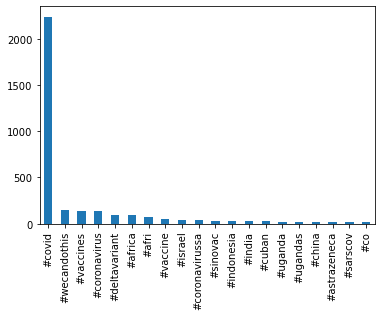

In [79]:
tweet_df['flattened_hashtags'].value_counts()[:20].plot(kind='bar')

In [80]:
#from Our Language analysis we can see there are differnt languages we can select only tweets with english 
English_tweets = tweet_df.loc[tweet_df['lang'] =="en"]
English_tweets

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text,flattened_hashtags
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @TelGlobalHealth: 🚨Africa is ""in the midst ...",0.000000,0.000000,en,NaN,ketuesriche,551,351,NaN,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass,rt @telglobalhealth africa is in the midst of ...,#redresearch
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @globalhlthtwit: Dr Moeti is head of WHO in...,0.133333,0.455556,en,NaN,Grid1949,66,92,NaN,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland",rt @globalhlthtwit dr moeti is head of who in ...,#wecandothis
2,2021-06-18 17:56:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @NHSRDForum: Thank you @research2note for c...,0.316667,0.483333,en,NaN,LeeTomlinson8,1195,1176,NaN,[#redresearch],"[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",NaN,rt @nhsrdforum thank you @researchnote for cre...,#covid
3,2021-06-18 17:56:10+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @HighWireTalk: Former Pfizer VP and Virolog...,0.166667,0.166667,en,NaN,RIPNY08,2666,2704,NaN,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",NaN,rt @highwiretalk former pfizer vp and virologi...,#covid
4,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @PeterHotez: I think it’s important that we...,0.300000,0.766667,en,NaN,pash22,28250,30819,NaN,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom,rt @peterhotez i think its important that we d...,#wecandothis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6527,2021-06-19 07:41:15+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @Givenkazeni: Zweli please just release the...,0.000000,0.400000,en,NaN,Mthatos_Vivi,447,1089,NaN,[],"[{'screen_name': 'Givenkazeni', 'name': 'le’Gi...",NaN,rt @givenkazeni zweli please just release the ...,NaN
6528,2021-06-19 07:41:26+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @HighWireTalk: Former Pfizer VP and Virolog...,0.166667,0.166667,en,NaN,wayno_af007,2224,2739,NaN,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...","The boro, MA",rt @highwiretalk former pfizer vp and virologi...,NaN
6529,2021-06-19 07:41:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...","@Jenfeds73 @DcrInYYC Respectfully, veterinaria...",0.281250,0.506250,en,NaN,dublonothing,3000,4709,NaN,[],"[{'screen_name': 'Jenfeds73', 'name': 'Bubs 🇨🇦...","Los Angeles, CA",@jenfeds @dcrinyyc respectfully veterinarians ...,NaN
6530,2021-06-19 07:41:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @WHOAFRO: ""Africa needs millions more doses...",0.166667,0.166667,en,NaN,DrAmirKhanGP,135163,1284,NaN,"[#covid, #afri]","[{'screen_name': 'WHOAFRO', 'name': 'WHO Afric...",Yorkshire and The Humber,rt @whoafro africa needs millions more doses h...,NaN


In [90]:
import string
from wordcloud import WordCloud 
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords

In [91]:
#text Preprocessing
English_tweets['clean_text']=English_tweets['clean_text'].astype(str)
English_tweets['clean_text'] = English_tweets['clean_text'].apply(lambda x: x.lower())
English_tweets['clean_text'] = English_tweets['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

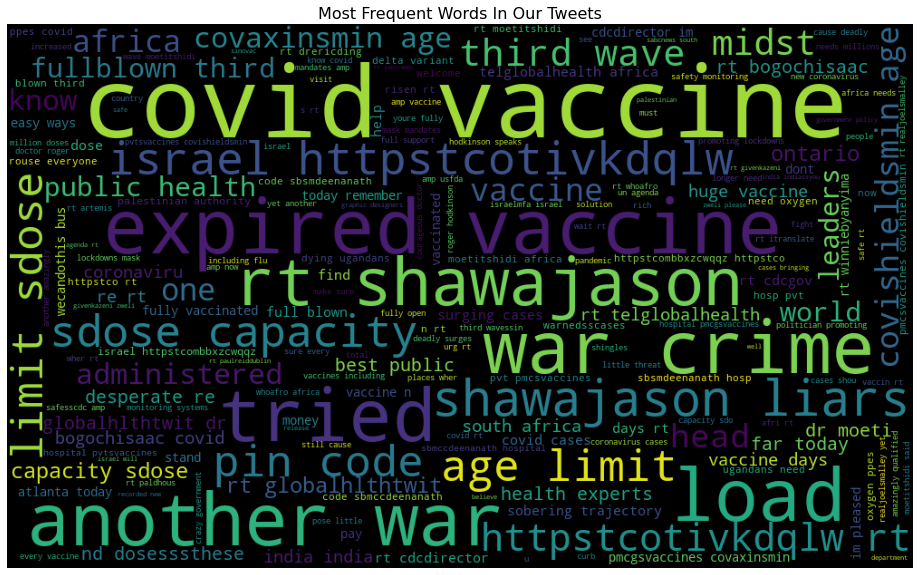

In [92]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600).generate(' '.join(English_tweets.clean_text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()